In [3]:
# import sys
# !{sys.executable} -m pip install --user plotly.express
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import numpy as np

In [18]:
# Load the CSV data
df = pd.read_csv('../data/equal_distribution_hds.csv')
# df = pd.read_csv('cleaned_heart_disease_majority.csv')
# df = pd.read_csv('heart_disease_remove_empty.csv')
numerical_vars = [
    "Age", "Blood Pressure", "Cholesterol Level", "BMI", "Sleep Hours", 
    "Triglyceride Level", "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"
]

categorical_vars = [
    'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 
    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status'
]

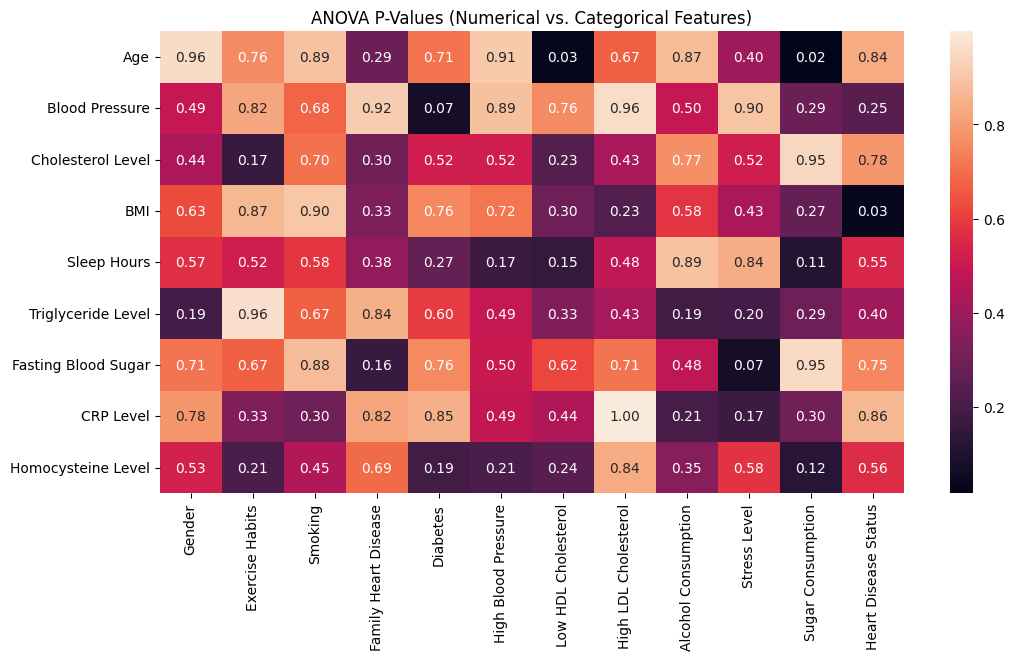

In [19]:
from scipy.stats import f_oneway, pointbiserialr

anova_results = pd.DataFrame(index=numerical_vars, columns=categorical_vars)

for cat in categorical_vars:
    for num in numerical_vars:
        groups = [df[num][df[cat] == category] for category in df[cat].unique()]
        anova_results.loc[num, cat] = f_oneway(*groups)[1]  # p-value

anova_results = anova_results.astype(float)

plt.figure(figsize=(12, 6))
sns.heatmap(anova_results, annot=True, cmap='rocket', fmt=".2f")
plt.title("ANOVA P-Values (Numerical vs. Categorical Features)")
plt.show()


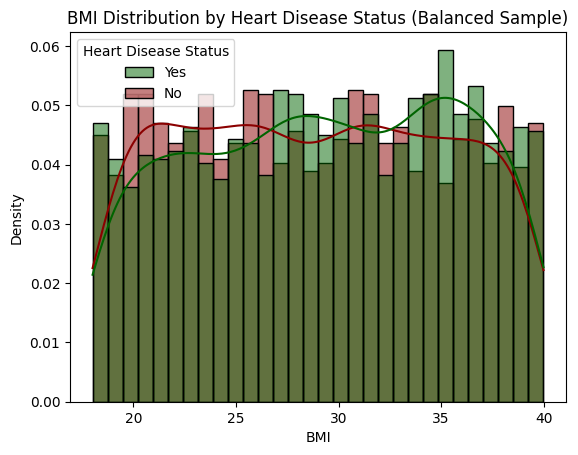

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="BMI", hue="Heart Disease Status", kde=True, bins=30, stat="density", common_norm=False, hue_order=["Yes", "No"], palette={"Yes": "darkgreen", "No": "darkred"})
plt.title("BMI Distribution by Heart Disease Status (Balanced Sample)")
plt.show()


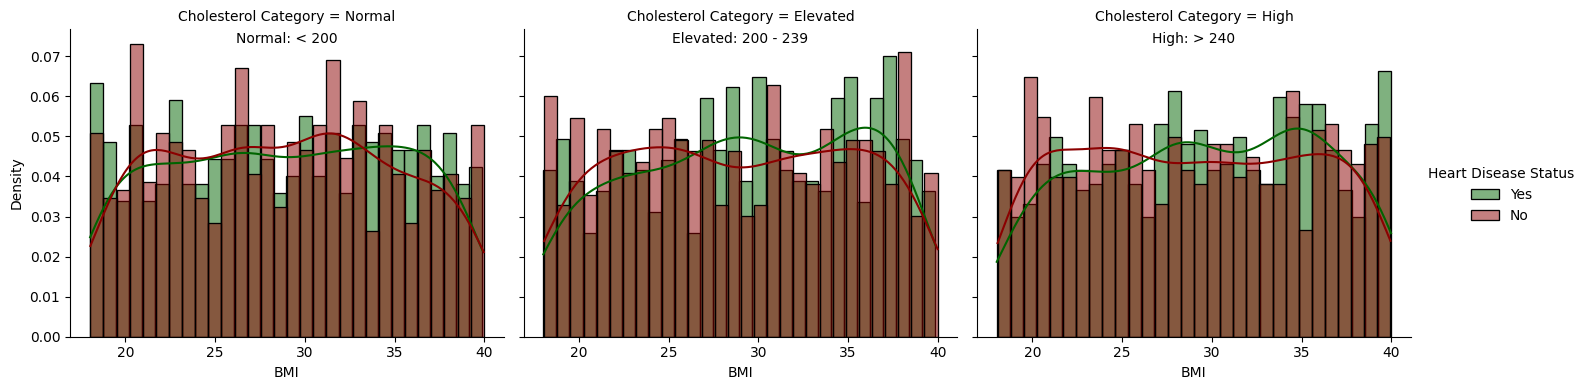

In [29]:
g = sns.FacetGrid(df, col="Cholesterol Category", hue="Heart Disease Status", height=4, aspect=1.2, sharex=True, sharey=True, palette={"No": "darkred", "Yes": "darkgreen"}, hue_order=["Yes", "No"], col_order=["Normal", "Elevated", "High"])
g.map(sns.histplot, "BMI", kde=True, bins=30, stat="density", common_norm=False)
g.add_legend()
for ax in g.axes.flat:
    if ax.get_title() == "Cholesterol Category = Normal":
        ax.text(0.5, 0.97, "Normal: < 200", ha="center", va="center", transform=ax.transAxes, fontsize=10, color="black")
    elif ax.get_title() == "Cholesterol Category = Elevated":
        ax.text(0.5, 0.97, "Elevated: 200 - 239", ha="center", va="center", transform=ax.transAxes, fontsize=10, color="black")
    elif ax.get_title() == "Cholesterol Category = High":
        ax.text(0.5, 0.97, "High: > 240", ha="center", va="center", transform=ax.transAxes, fontsize=10, color="black")

plt.show()


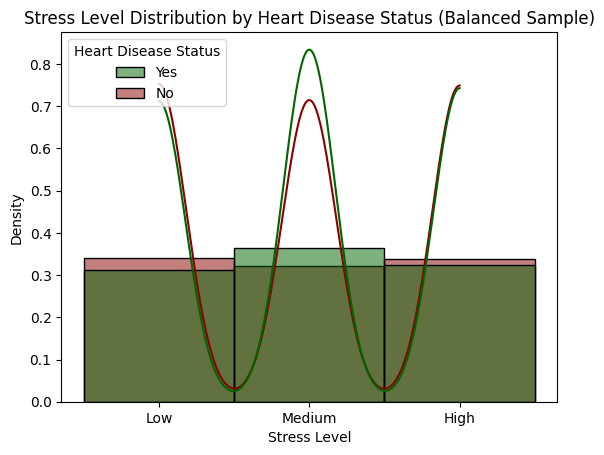

In [22]:
df['Stress Level'] = pd.Categorical(df['Stress Level'], categories=["Low", "Medium", "High"], ordered=True)
sns.histplot(df, x="Stress Level", hue="Heart Disease Status", kde=True, bins=30, stat="density", common_norm=False, hue_order=["Yes", "No"], palette={"Yes": "darkgreen", "No": "darkred"})
plt.title("Stress Level Distribution by Heart Disease Status (Balanced Sample)")
plt.show()

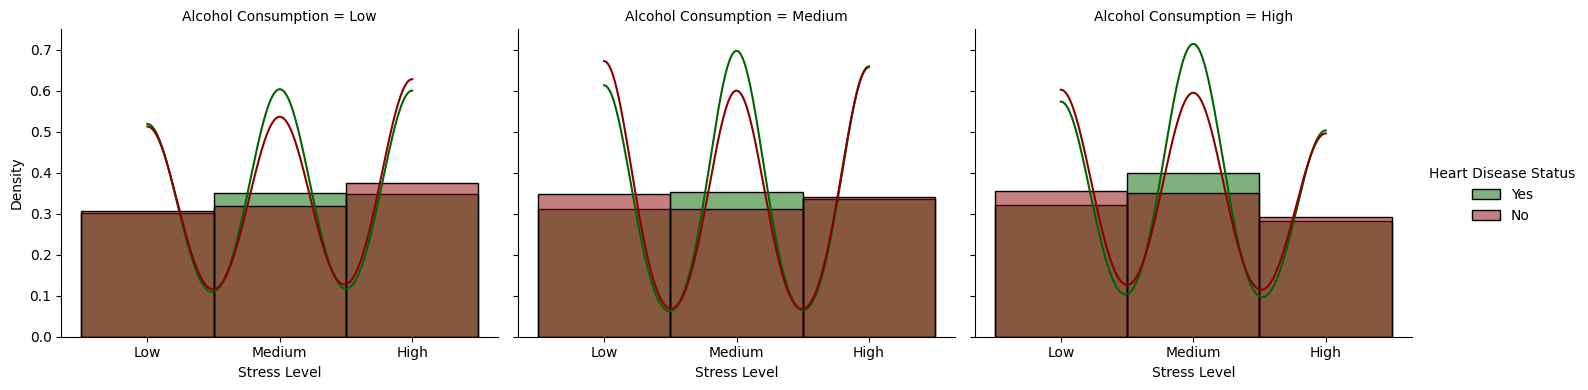

In [23]:
g = sns.FacetGrid(df, col="Alcohol Consumption", hue="Heart Disease Status", height=4, aspect=1.2, sharex=True, sharey=True, hue_order=["Yes", "No"], palette={"Yes": "darkgreen", "No": "darkred"}, col_order=["Low", "Medium", "High"])
g.map(sns.histplot, "Stress Level", kde=True, bins=30, stat="density", common_norm=False)
g.add_legend()
plt.show()

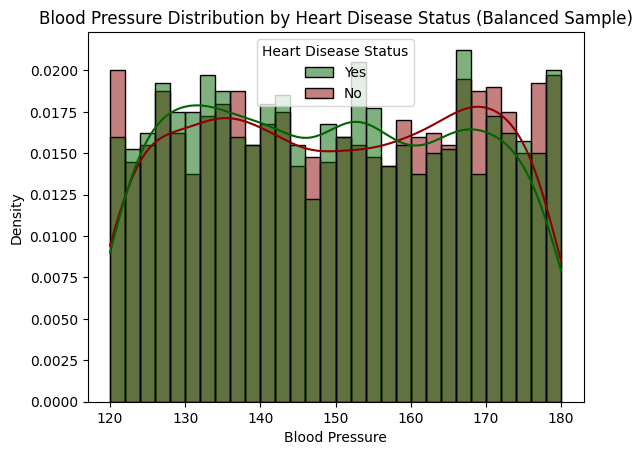

In [24]:
df['Blood Pressure Category'] = pd.Categorical(df['Blood Pressure Category'], categories=["Normal", "Elevated", "High", "Very High"], ordered=True)
sns.histplot(df, x="Blood Pressure", hue="Heart Disease Status", kde=True, bins=30, stat="density", common_norm=False, hue_order=["Yes", "No"], palette={"Yes": "darkgreen", "No": "darkred"})
plt.title("Blood Pressure Distribution by Heart Disease Status (Balanced Sample)")
plt.show()

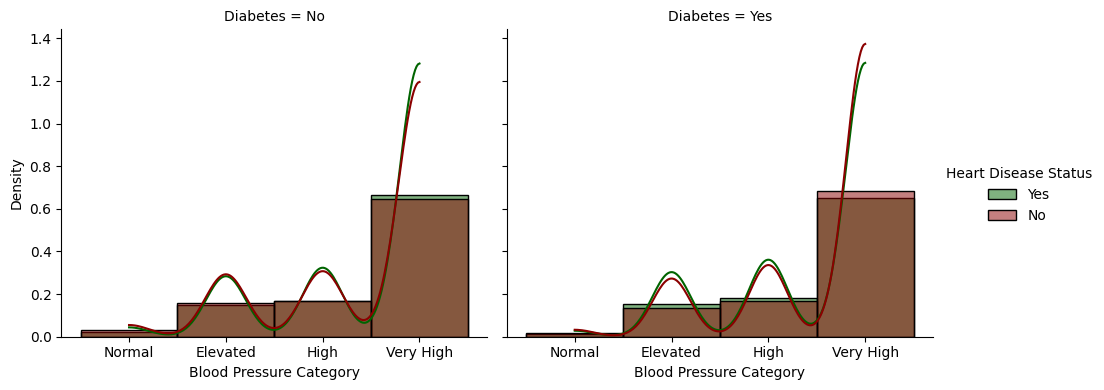

In [25]:
g = sns.FacetGrid(df, col="Diabetes", hue="Heart Disease Status", height=4, aspect=1.2, sharex=True, sharey=True, hue_order=["Yes", "No"], palette={"Yes": "darkgreen", "No": "darkred"})
g.map(sns.histplot, "Blood Pressure Category", kde=True, bins=30, stat="density", common_norm=False)
g.add_legend()
plt.show()